In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Using matplotlib
import matplotlib.pyplot as plt

# Adding dataset for Exploratory Data Analysis

## Data preparation and Cleaning
1. Load the files using pandas
2. Look at some informations about the data & the columns
3. Fix any missing or incorrect values

In [4]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [5]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# Apply only for numerical data types
# Getting more insights about numerical data columns 
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
# Finding all the columns having numerical values/ or columns of numeric datatypes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

## Finding Missing values & visualisation

In [9]:
# Finding total no of missing values per columns
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
# Getting the sorted order
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [11]:
# Getting the percentage values
percentage_missing = (df.isna().sum().sort_values(ascending=False) / len(df)) * 100
# print(percentage_missing, "0.2f%")
percentage_missing

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [12]:
percentage_missing.dtypes

dtype('float64')

In [13]:
type(percentage_missing)

pandas.core.series.Series

<Axes: >

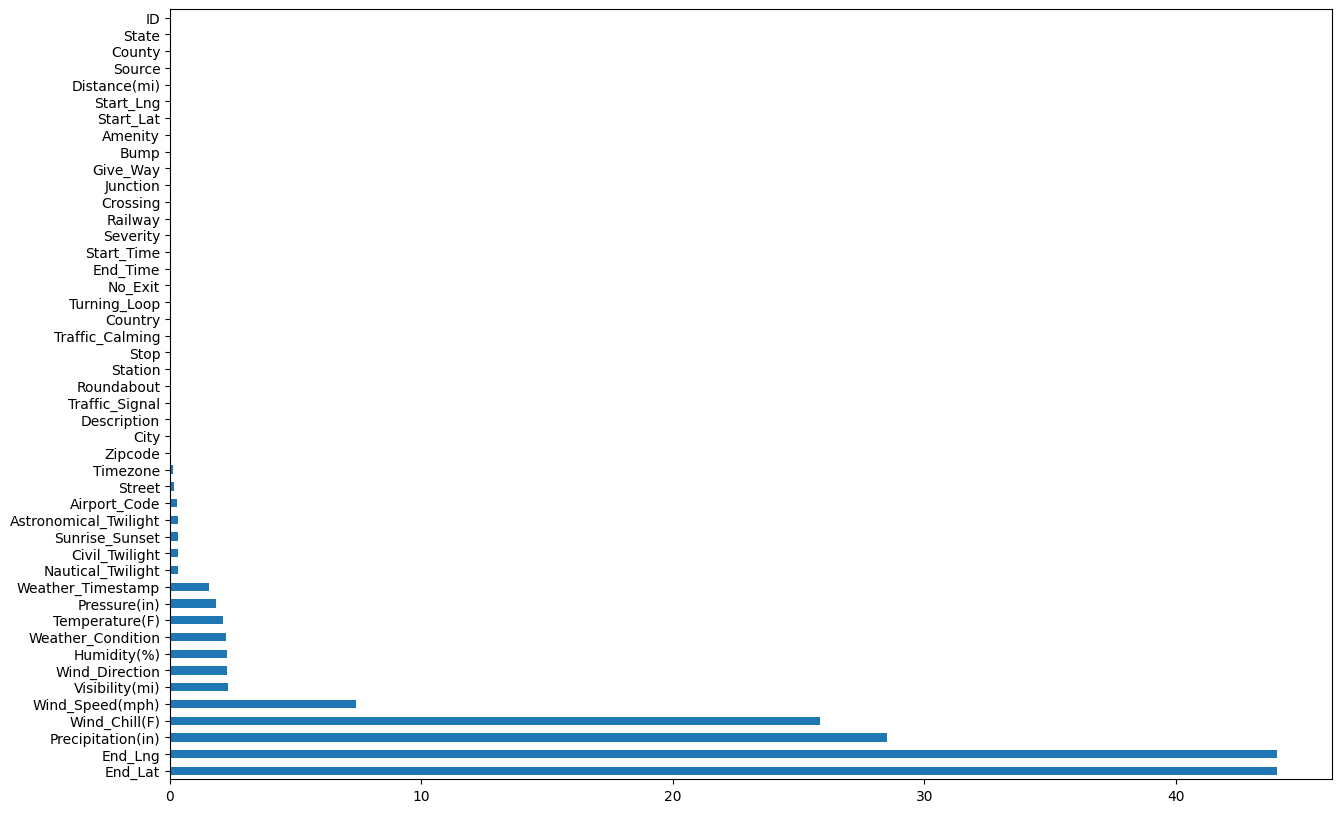

In [13]:
# Barplot of missing values
percentage_missing.plot(kind='barh', figsize=(15, 10))

<Axes: >

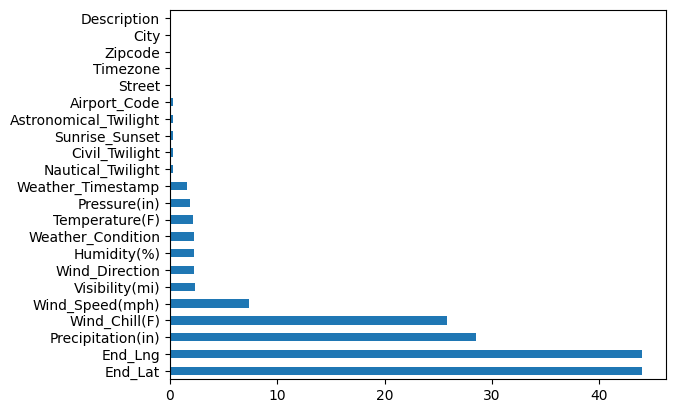

In [14]:
# Only plot those which has missing values
# We can create this by using filter
percentage_missing[percentage_missing != 0].plot(kind='barh')

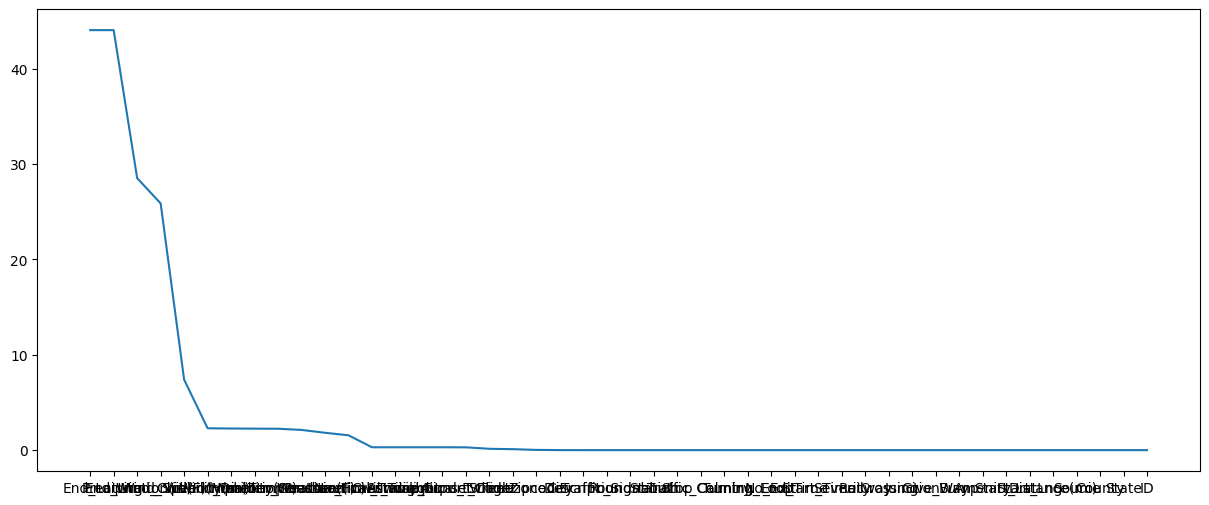

In [15]:
# Using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(percentage_missing)
plt.show()

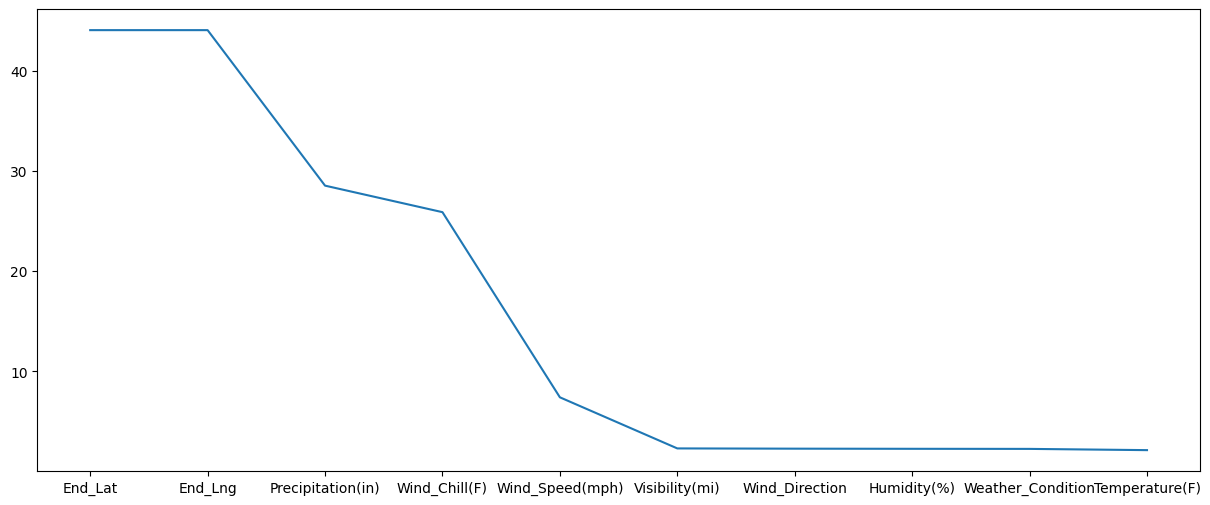

In [ ]:
# Using matplotlib
plt.figure(figsize=(15, 6))
plt.plot(percentage_missing[percentage_missing >= 2])  # finding those which has missing percentage >= 2%
plt.show()

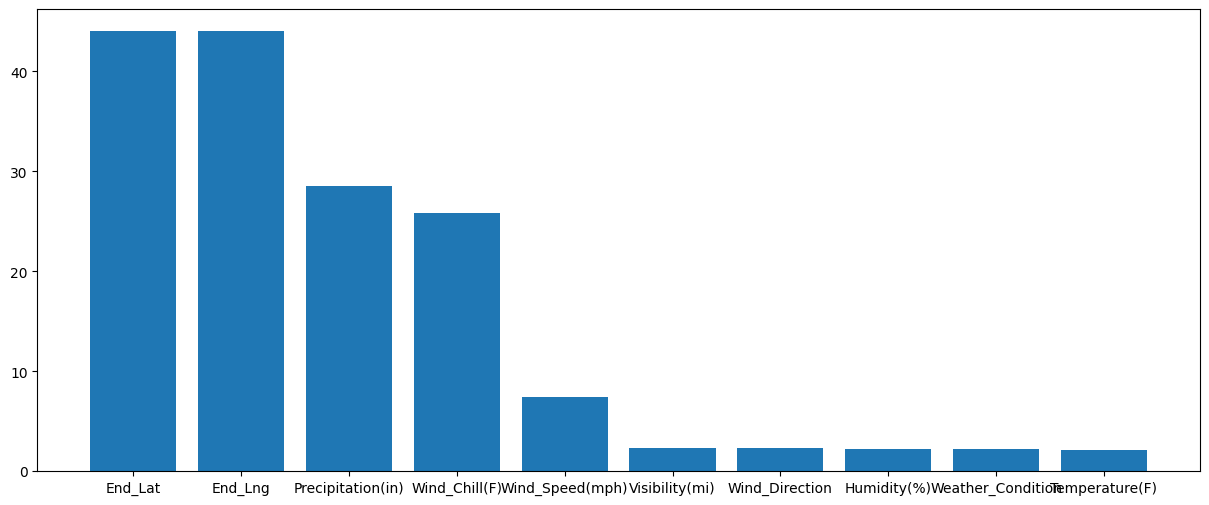

In [17]:
# Using matplotlib
plt.figure(figsize=(15, 6))
plt.bar(percentage_missing[percentage_missing >= 2].index, percentage_missing[percentage_missing >= 2].values)  # finding those which has missing percentage >= 2%
plt.show()

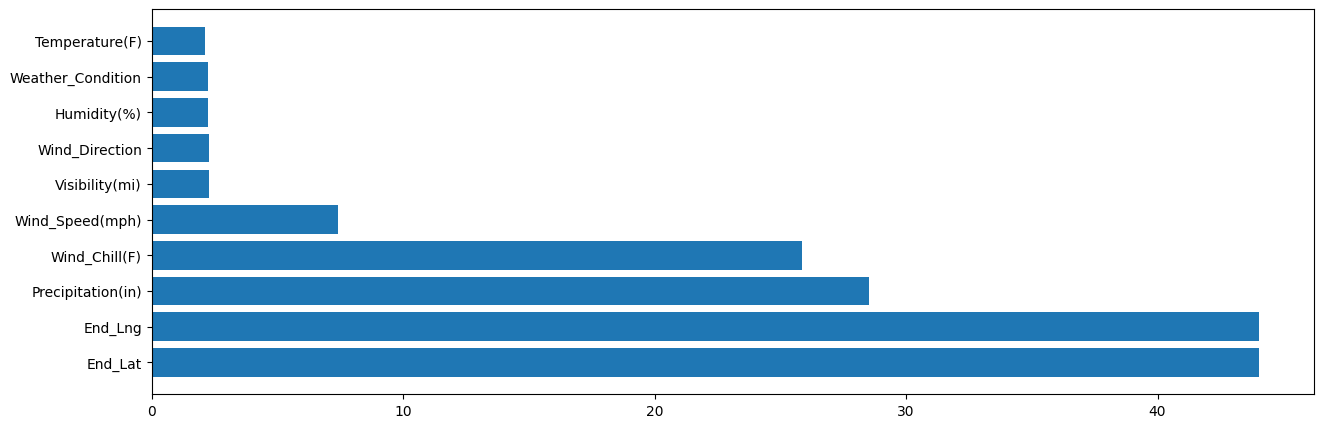

In [18]:
# Using matplotlib
# making horizontal bar plot using 'barh()' fucntion
plt.figure(figsize=(15, 5))
plt.barh(percentage_missing[percentage_missing >= 2].index, percentage_missing[percentage_missing >= 2].values)  # finding those which has missing percentage >= 2%
plt.show()

<Axes: ylabel='count'>

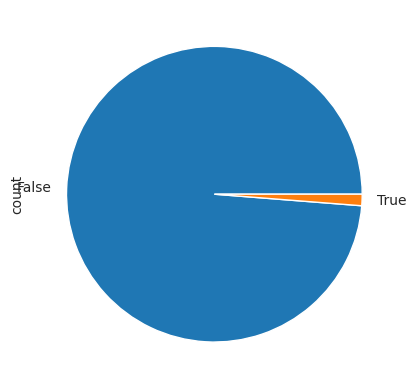

In [16]:
df.Amenity.value_counts().plot(kind='pie')

# Data Preprocessing & Data Cleaning & EDA

## Removing columns & Data Cleaning
1. Removing End_Lng & End_Lat for their high missing values and low significance.
2. Removing End_Time, County, Country, Zipcode, Timezone, Airport_Code, Street, Description as they are insignificant.
3. Checking Amenity, bump, crossing, give_way, junction, no_exit, Railway, roundabout, Station, stop, traffic_calming, traffic_signal, turning_loop. After getting conclusion we are removing those columns as they distribution is very smooth. So they are not significant feature.
4. Astronomical_Twilight, Nautical_Twilight are not that significant. So we are removing that.
5. From Sunrise_Sunset & Civil_Twilight we came to a conclusion and after that we remove the Sunrise_Sunset column. And kept the Civil_Twilight column as it is important.
6. Can Ignore precipitation column as most of the cases precipitation is zero.
7. Also Wind_Chill and Wind_Speed is in normal range for most of the cases. So we can ignore these two columns also.
8. All kind of possible wind direction is present, and all are almost equal amount. So this also doesn't have any significance.
9. Mean of Humidity(%) is 64%. Normal Condition. Not that much of significance.
10. Again pressure and temperature also normal. Not much significant.
11. Also visibility is not that important.
12. Distance and Severity are the effects of accidents. So they can't be features for any ML model.
13. 

In [57]:
# Removing unnecessary columns
# modified_df = df.drop(columns=['End_Lng', 'End_Lat', 'End_Time', 'County', 'Country', 'Zipcode', 'Timezone', 'Airport_Code', 'Street', 'Description'])

In [58]:
# modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   City                   object 
 8   State                  object 
 9   Weather_Timestamp      object 
 10  Temperature(F)         float64
 11  Wind_Chill(F)          float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Precipitation(in)      float64
 18  Weather_Condition      object 
 19  Amenity                bool   
 20  Bump                   bool   
 21  Crossing               bool   
 22  Give_Way          

<Axes: ylabel='count'>

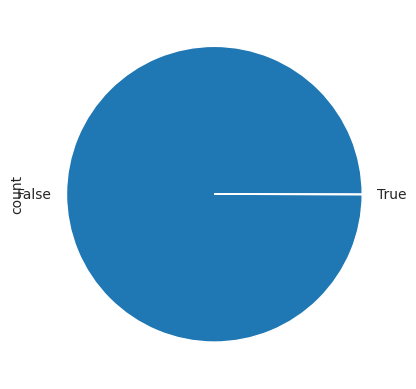

In [17]:
df.Bump.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

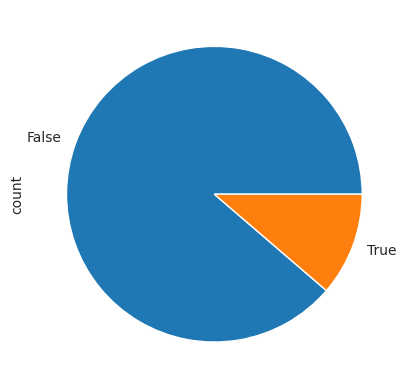

In [18]:
df.Crossing.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

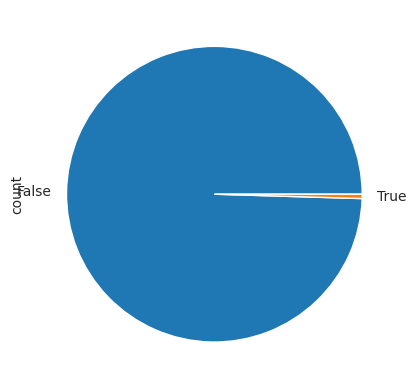

In [19]:
df.Give_Way.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

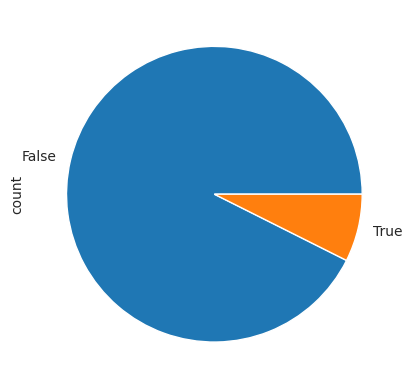

In [20]:
df.Junction.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

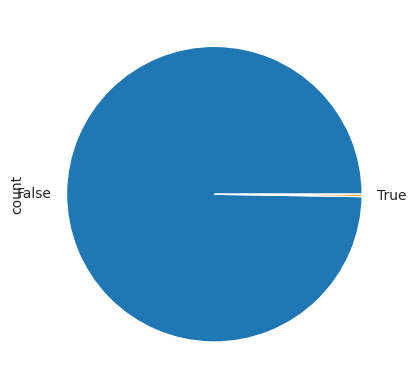

In [21]:
df.No_Exit.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

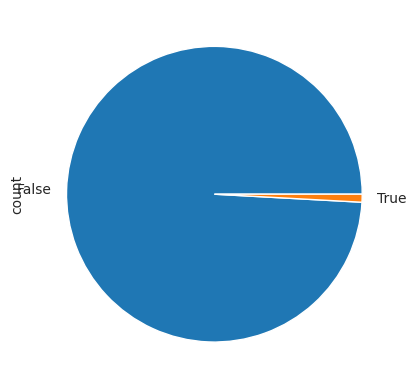

In [22]:
df.Railway.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

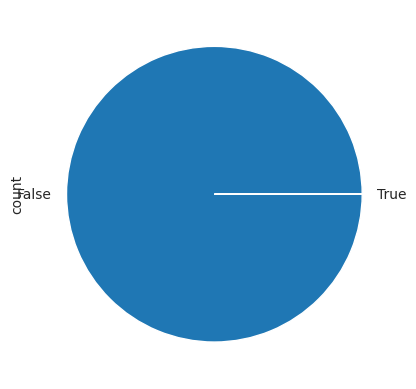

In [23]:
df.Roundabout.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

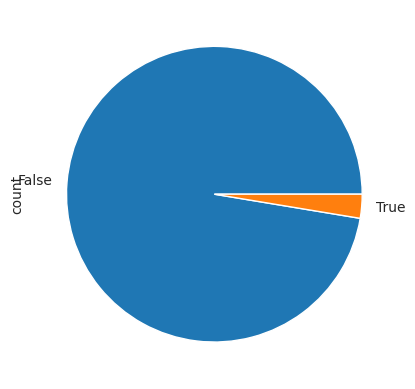

In [24]:
df.Station.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

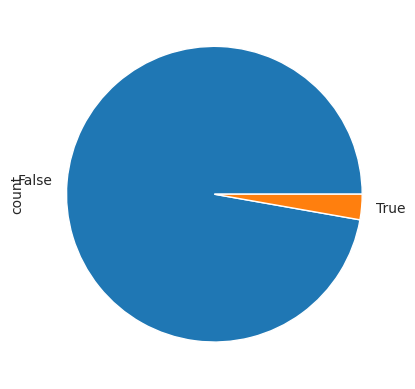

In [25]:
df.Stop.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

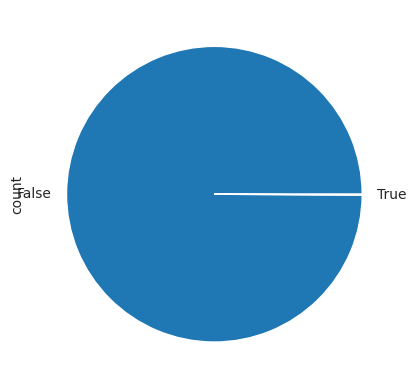

In [26]:
df.Traffic_Calming.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

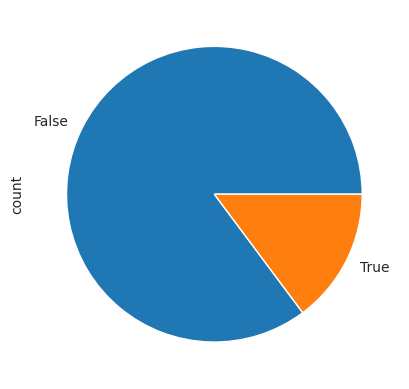

In [27]:
df.Traffic_Signal.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

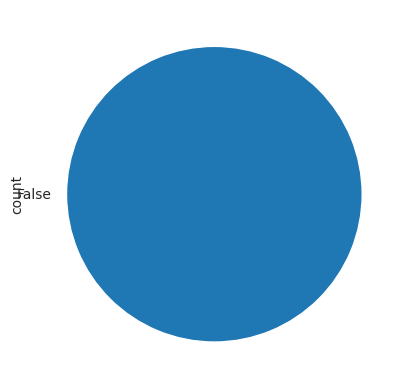

In [28]:
df.Turning_Loop.value_counts().plot(kind='pie')

### # Checking Amenity, bump, crossing, give_way, junction, no_exit, Railway, roundabout, Station, stop, traffic_calming, traffic_signal, turning_loop.

In [29]:
# Checking Amenity, bump, crossing, give_way, junction, no_exit, Railway, roundabout, Station, stop, traffic_calming, traffic_signal, turning_loop. After getting conclusion we are removing those columns as they distribution is very smooth. So they are not significant feature.
# modified_df = modified_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'])

In [30]:
# modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   City                   object 
 8   State                  object 
 9   Weather_Timestamp      object 
 10  Temperature(F)         float64
 11  Wind_Chill(F)          float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Precipitation(in)      float64
 18  Weather_Condition      object 
 19  Sunrise_Sunset         object 
 20  Civil_Twilight         object 
 21  Nautical_Twilight      object 
 22  Astronomical_Twili

### Checking Civil Twilight column

<Axes: ylabel='count'>

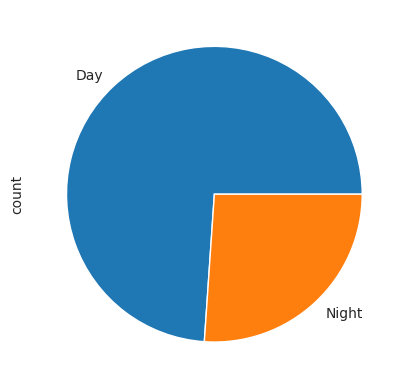

In [31]:
# Checking civil twilight values
df.Civil_Twilight.value_counts().plot(kind='pie')

<Axes: ylabel='count'>

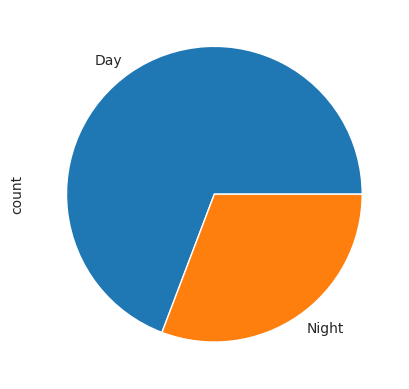

In [32]:
df.Sunrise_Sunset.value_counts().plot(kind='pie')

In [33]:
modified_df = modified_df.drop(columns=['Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [34]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   Severity           int64  
 3   Start_Time         object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   Distance(mi)       float64
 7   City               object 
 8   State              object 
 9   Weather_Timestamp  object 
 10  Temperature(F)     float64
 11  Wind_Chill(F)      float64
 12  Humidity(%)        float64
 13  Pressure(in)       float64
 14  Visibility(mi)     float64
 15  Wind_Direction     object 
 16  Wind_Speed(mph)    float64
 17  Precipitation(in)  float64
 18  Weather_Condition  object 
dtypes: float64(10), int64(1), object(8)
memory usage: 1.1+ GB


In [35]:
# Getting the percentage values
percentage_msg = (modified_df.isna().sum().sort_values(ascending=False) / len(modified_df)) * 100
percentage_msg

Precipitation(in)    28.512858
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
Visibility(mi)        2.291524
Wind_Direction        2.267043
Humidity(%)           2.253301
Weather_Condition     2.244438
Temperature(F)        2.120143
Pressure(in)          1.820288
Weather_Timestamp     1.555666
City                  0.003274
Source                0.000000
State                 0.000000
Distance(mi)          0.000000
Start_Lng             0.000000
Start_Lat             0.000000
Start_Time            0.000000
Severity              0.000000
ID                    0.000000
dtype: float64

### Checking Precipitation column.

<Axes: ylabel='count'>

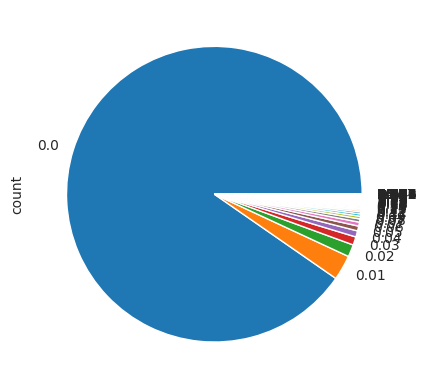

In [37]:
df['Precipitation(in)'].value_counts().plot(kind='pie')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Precipitation(in)', ylabel='Count'>

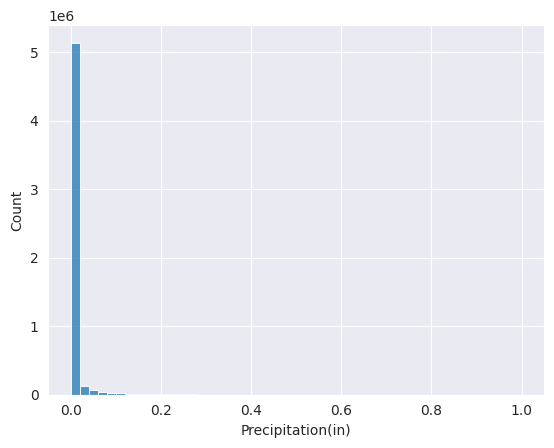

In [41]:
# Checking precipitation values
sns.histplot(df['Precipitation(in)'], bins=50, binrange=(0, 1))

In [17]:
# Checking variance
print(((df['Precipitation(in)'] - df['Precipitation(in)'].min()) / (df['Precipitation(in)'].max() - df['Precipitation(in)'].min())).var())

9.134524001519168e-06


In [51]:
print(df['Precipitation(in)'].mean())

0.008407209807110039


### Check Wind_Chill column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind_Chill(F)', ylabel='Percent'>

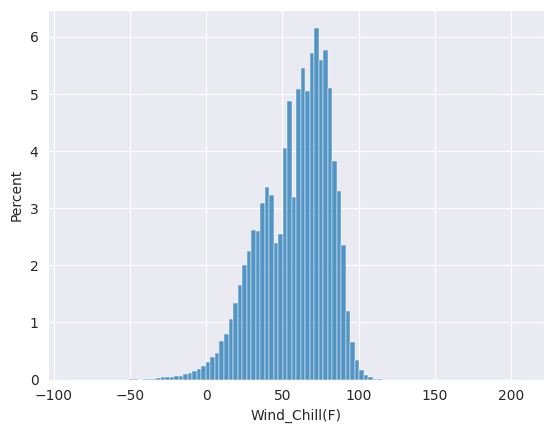

In [42]:
# Checking precipitation values
sns.histplot(df['Wind_Chill(F)'], bins=100, stat='percent')

In [18]:
# Checking variance
print(((df['Wind_Chill(F)'] - df['Wind_Chill(F)'].min()) / (df['Wind_Chill(F)'].max() - df['Wind_Chill(F)'].min())).var())

0.005721609817687033


In [49]:
print(df['Wind_Chill(F)'].mean())

58.25104839533108


### Check Wind_Speed(mph) column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Wind_Speed(mph)', ylabel='Percent'>

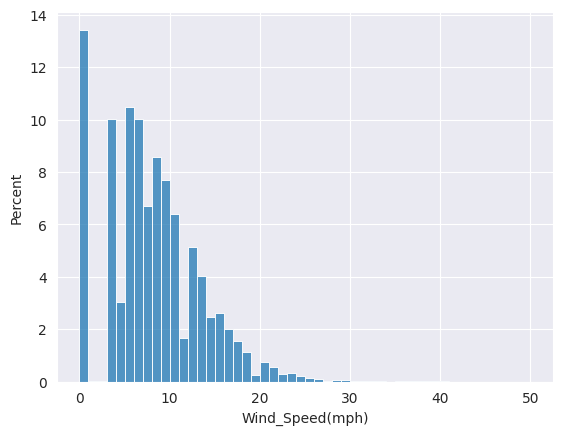

In [43]:
# Checking precipitation values
sns.histplot(df['Wind_Speed(mph)'], bins=50, stat='percent', binrange=(0, 50))

In [19]:
# Checking variance
print(((df['Wind_Speed(mph)'] - df['Wind_Speed(mph)'].min()) / (df['Wind_Speed(mph)'].max() - df['Wind_Speed(mph)'].min())).var())

2.4907936220294693e-05


In [48]:
print(df['Wind_Speed(mph)'].mean())

7.685489595665096


### Check Wind_Direction column

<Axes: ylabel='count'>

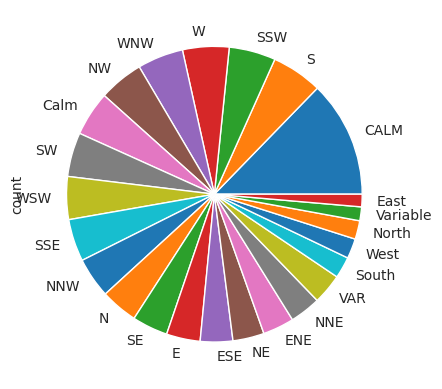

In [44]:
df['Wind_Direction'].value_counts().plot(kind='pie')

### Checking Humidity column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity(%)', ylabel='Percent'>

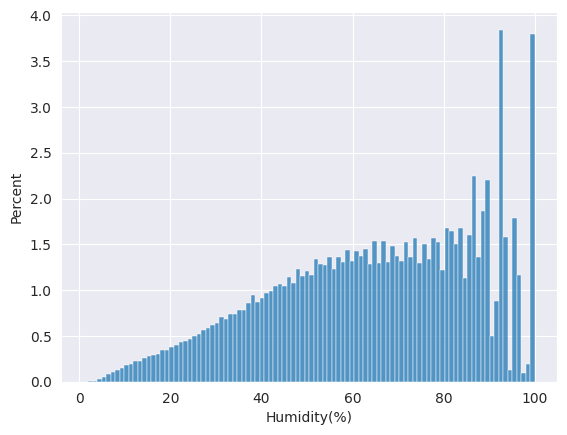

In [46]:
# Checking Humidity values
sns.histplot(df['Humidity(%)'], bins=100, stat='percent')

In [15]:
# Checking variance
print(((df['Humidity(%)'] - df['Humidity(%)'].min()) / (df['Humidity(%)'].max() - df['Humidity(%)'].min())).var())

0.05313708447522016


In [47]:
print(df['Humidity(%)'].mean())

64.83104146672403


### Checking the Pressure(in) column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pressure(in)', ylabel='Percent'>

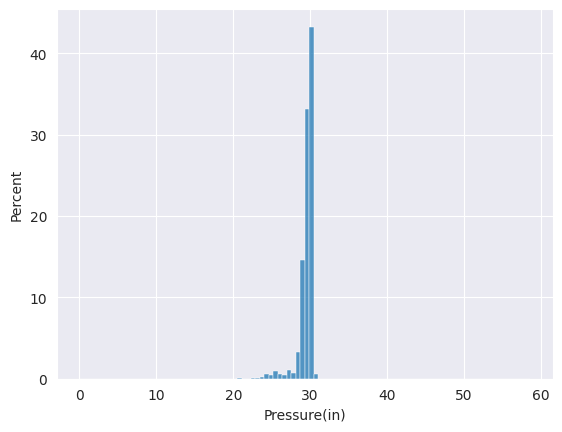

In [52]:
sns.histplot(df['Pressure(in)'], bins=100, stat='percent')

In [20]:
# Checking variance
print(((df['Pressure(in)'] - df['Pressure(in)'].min()) / (df['Pressure(in)'].max() - df['Pressure(in)'].min())).var())

0.0002945235594222895


In [53]:
df['Pressure(in)'].mean()

29.53898560765659

### Checking Temperature column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature(F)', ylabel='Count'>

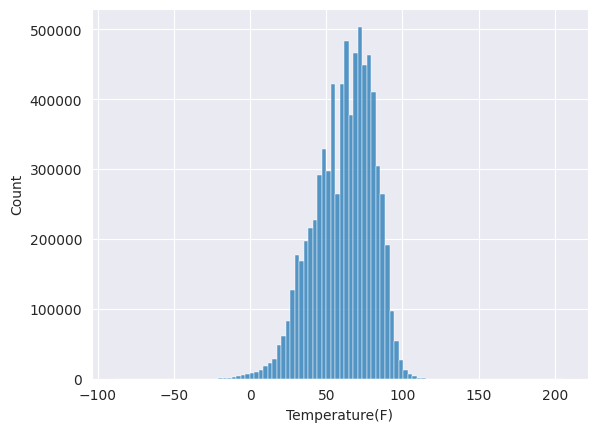

In [61]:
sns.histplot(df['Temperature(F)'], bins=100)

In [21]:
# Checking variance
print(((df['Temperature(F)'] - df['Temperature(F)'].min()) / (df['Temperature(F)'].max() - df['Temperature(F)'].min())).var())

0.004126175715331681


In [56]:
df['Temperature(F)'].mean()

61.663285809409984

### Check Visibility column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Visibility(mi)', ylabel='Count'>

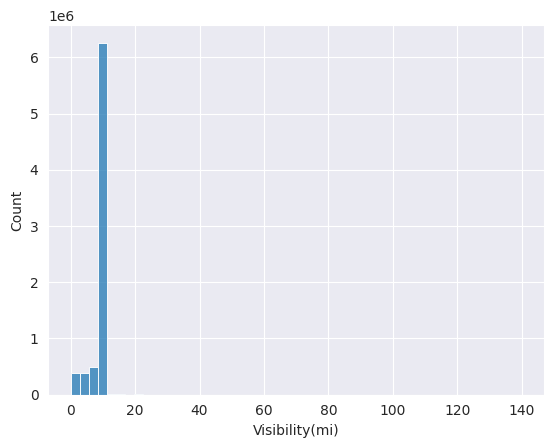

In [63]:
sns.histplot(df['Visibility(mi)'], bins=50)

In [22]:
# Checking variance
print(((df['Visibility(mi)'] - df['Visibility(mi)'].min()) / (df['Visibility(mi)'].max() - df['Visibility(mi)'].min())).var())

0.0003687266578806544


In [65]:
df['Visibility(mi)'].mean()

9.09037644796337

### Checking Weather timestamp column

In [ ]:
sns.histplot(df['Weather_Timestamp'], bins=50)

In [ ]:
df['Weather_Timestamp'].mean()

### Check Distance column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distance(mi)', ylabel='Count'>

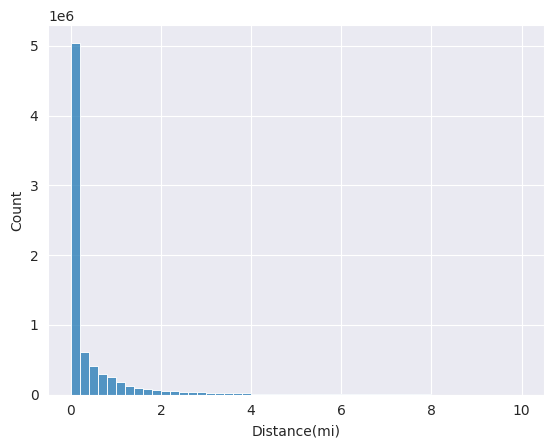

In [8]:
sns.histplot(df['Distance(mi)'], bins=50, binrange=(0, 10))

In [9]:
df['Distance(mi)'].mean()

0.5618422831523753

### Check Severity column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Count'>

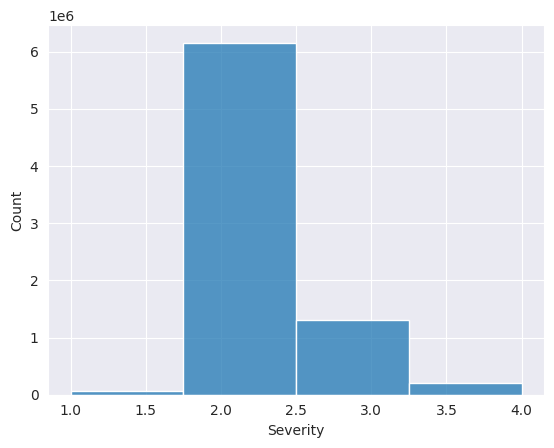

In [10]:
sns.histplot(df['Severity'], bins=4)

<Axes: ylabel='count'>

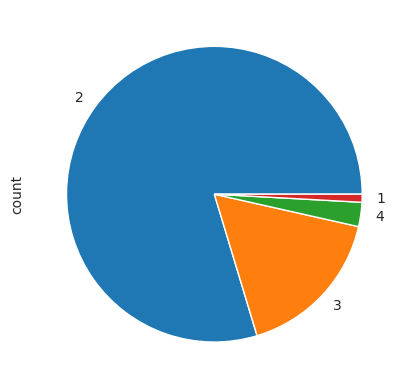

In [12]:
df['Severity'].value_counts().plot(kind='pie')

In [11]:
df['Severity'].mean()

2.212384487643875

### Checking Weather Condition

<Axes: ylabel='count'>

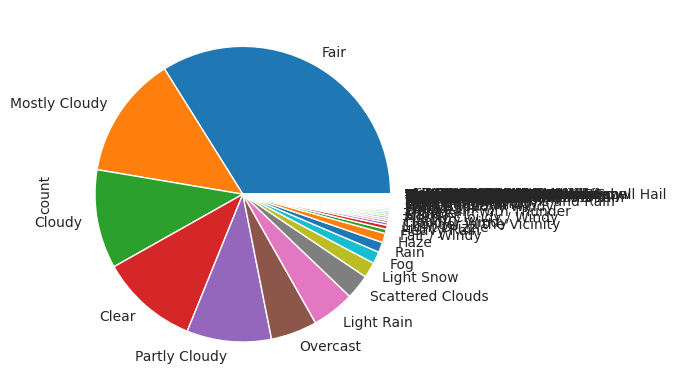

In [13]:
df['Weather_Condition'].value_counts().plot(kind='pie')

## Sources of Data

In [25]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

<Axes: ylabel='count'>

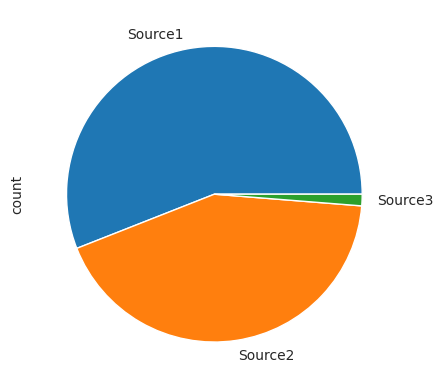

In [26]:
df.Source.value_counts().plot(kind='pie')

### So there are 3 Sources of data - Source1, Source2, Source3

In [10]:
df.Start_Time = pd.to_datetime(df["Start_Time"], format='ISO8601')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

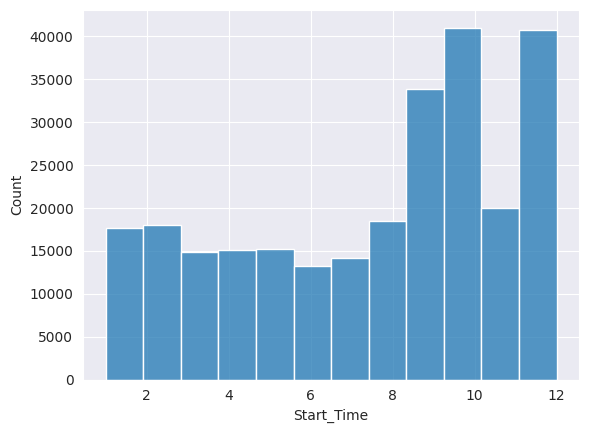

In [11]:
# For Source1
accident_each_month_per_year = df[df.Start_Time.dt.year == 2019]
accident_each_month_per_year_source1 = accident_each_month_per_year[accident_each_month_per_year.Source == 'Source1']
sns.histplot(accident_each_month_per_year_source1.Start_Time.dt.month, bins=12)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

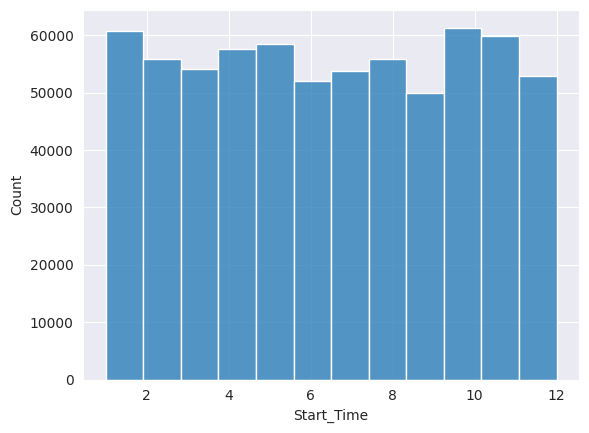

In [12]:
# For Source2
accident_each_month_per_year = df[df.Start_Time.dt.year == 2019]
accident_each_month_per_year_source2 = accident_each_month_per_year[accident_each_month_per_year.Source == 'Source2']
sns.histplot(accident_each_month_per_year_source2.Start_Time.dt.month, bins=12)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

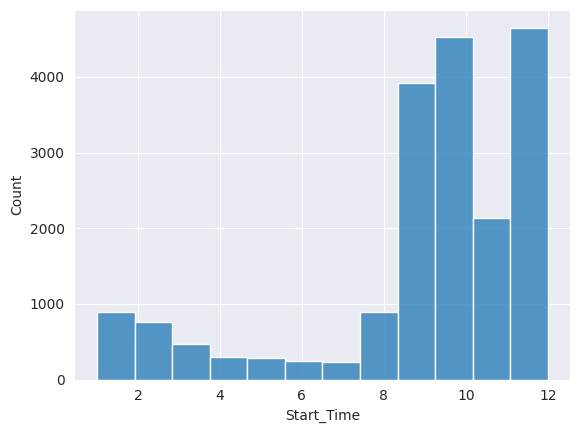

In [13]:
# For Source3
accident_each_month_per_year = df[df.Start_Time.dt.year == 2019]
accident_each_month_per_year_source3 = accident_each_month_per_year[accident_each_month_per_year.Source == 'Source3']
sns.histplot(accident_each_month_per_year_source3.Start_Time.dt.month, bins=12)

#### We can see Source3 is unreliable source. So we will drop all the data form Source3

In [30]:
modified_df = df.drop(df[df['Source'] == 'Source3'].index)

## For 2016 & 2023 there is not data for full year.
### So we will delete data for those years

In [31]:
modified_df = modified_df.drop(modified_df[modified_df.Start_Time.dt.year == 2016].index)

In [32]:
modified_df = modified_df.drop(modified_df[modified_df.Start_Time.dt.year == 2023].index)

## Cleaning the rows where City & Civil_Twilight is NULL

In [33]:
df = df.dropna(subset=['City', 'Civil_Twilight'])

In [34]:
# For all rows and columns 
# df_cleaned = df.dropna()

# Feature Engineering

### Removing Unnecessary Columns

In [35]:
# Removing unnecessary columns
modified_df = df.drop(columns=['End_Lng', 'End_Lat', 'End_Time', 'County', 'Country', 'Zipcode', 'Timezone', 'Airport_Code', 'Street', 'Description', 'Weather_Timestamp'])

In [36]:
# Checking Amenity, bump, crossing, give_way, junction, no_exit, Railway, roundabout, Station, stop, traffic_calming, traffic_signal, turning_loop. After getting conclusion we are removing those columns as they distribution is very smooth. So they are not significant feature.
modified_df = modified_df.drop(columns=['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'])

In [37]:
modified_df = modified_df.drop(columns=['Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [38]:
# As Distance(mi) and Severity are effect of accidents so they can not be a feature
modified_df = modified_df.drop(columns=['Severity', 'Distance(mi)'])

### Now as the variance of columns - Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition  is very low(<0.05). So we will drop those columns.

In [39]:
modified_df = modified_df.drop(columns=['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'])

In [40]:
modified_df = modified_df.drop(columns=['Source'])

In [41]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ID              object        
 1   Start_Time      datetime64[ns]
 2   Start_Lat       float64       
 3   Start_Lng       float64       
 4   City            object        
 5   State           object        
 6   Civil_Twilight  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 728.3+ MB


In [42]:
modified_df.isna().sum().sort_values()

ID                0
Start_Time        0
Start_Lat         0
Start_Lng         0
City              0
State             0
Civil_Twilight    0
dtype: int64

In [43]:
cleaned_df = modified_df

In [44]:
cleaned_df.isna().sum().sort_values()

ID                0
Start_Time        0
Start_Lat         0
Start_Lng         0
City              0
State             0
Civil_Twilight    0
dtype: int64

In [45]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ID              object        
 1   Start_Time      datetime64[ns]
 2   Start_Lat       float64       
 3   Start_Lng       float64       
 4   City            object        
 5   State           object        
 6   Civil_Twilight  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 728.3+ MB


In [46]:
cleaned_df

,ID,Start_Time,Start_Lat,Start_Lng,City,State,Civil_Twilight
0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,Night
1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,Night
2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,Night
3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,Day
4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,Day
...,...,...,...,...,...,...,...
7728389,A-7777757,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,Day
7728390,A-7777758,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,Day
7728391,A-7777759,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,Day
7728392,A-7777760,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,Day


# Exploratory Data Analysis of Important Columns & Visualization

In [80]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## We will choose only the significant columns for analysis
1. State
2. City
3. Start Time
4. Start Lat
5. Start Lng

### City

In [79]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7705148, dtype: object

In [117]:
df.City.unique()[0:100]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [118]:
cities = df.City.unique()
len(cities)

13679

In [119]:
# Total count of unique elements a column
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [120]:
cities_by_accident[:50]

City
Miami              186917
Houston            169609
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68186
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38178
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35399
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27410
New Orleans         27354
Bronx               27297
Rochester           26866
Fort Lauderdale     26205
Detroit             24865
Grand R

<Axes: ylabel='City'>

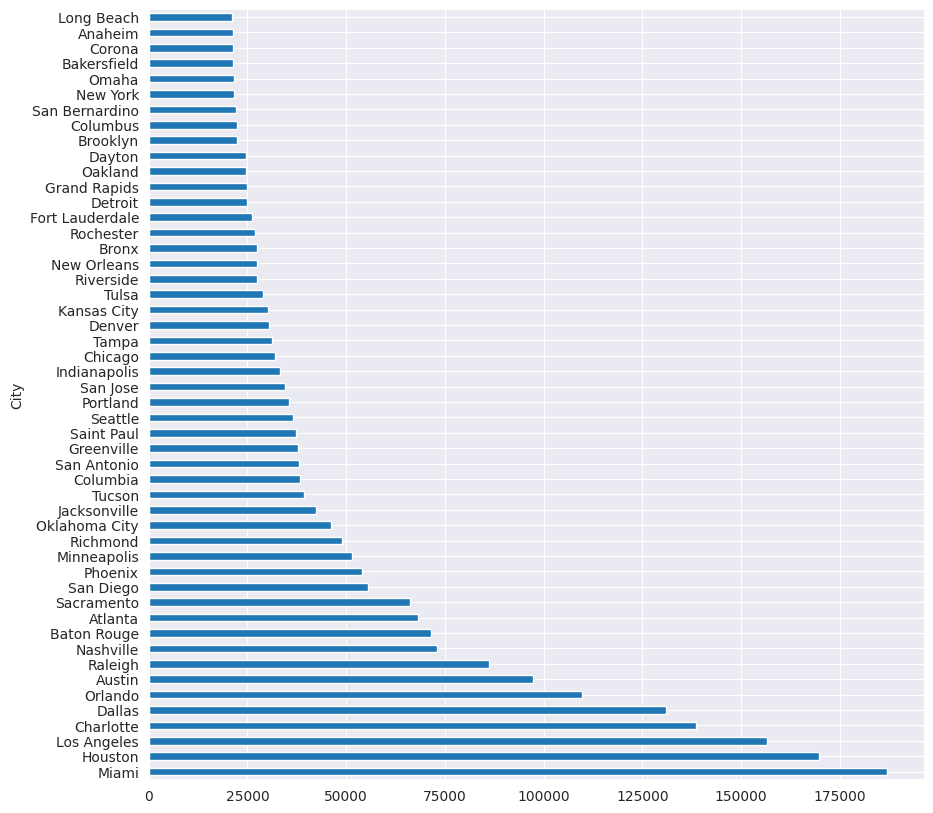

In [121]:
cities_by_accident[0:50].plot(kind='barh', figsize=(10, 10))

In [122]:
import seaborn as sns
sns.set_style('darkgrid')

<ipython-input-123-15a12b8f1442>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

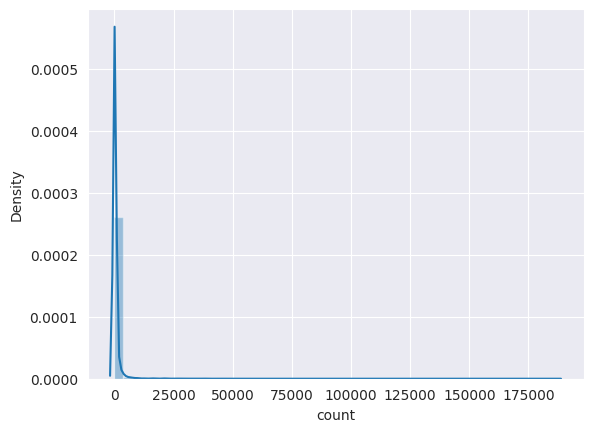

In [123]:
# Distribution of cities with accidents
sns.distplot(cities_by_accident)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Percent'>

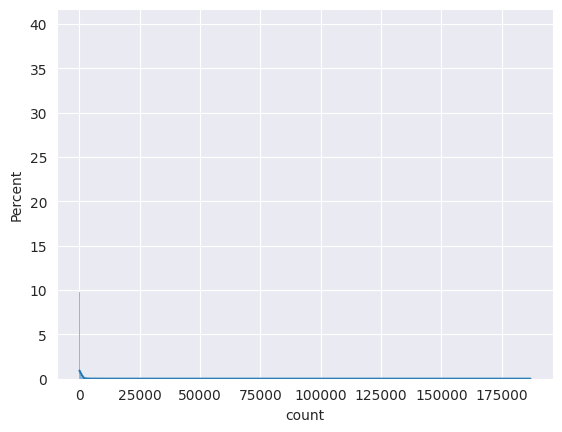

In [127]:
sns.histplot(cities_by_accident, kde=True, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

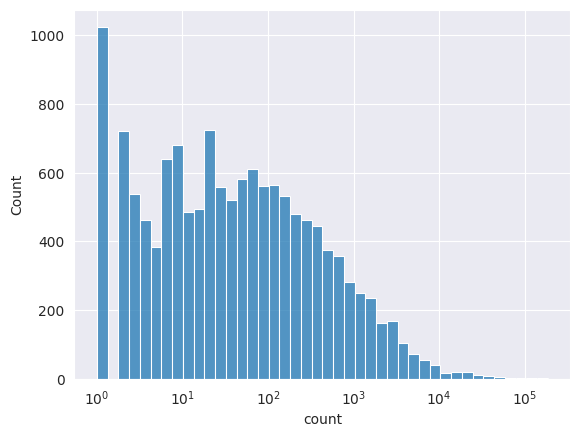

In [124]:
# Viewing using logarithmic scale
sns.histplot(cities_by_accident, log_scale=True)

In [128]:
# Getting high accident and low accident cities count
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [129]:
print(len(high_accident_cities)/ len(cities) * 100)
print(len(low_accident_cities)/ len(cities) * 100)

8.904159660793917
91.0885298632941


<ipython-input-130-50976d58a416>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

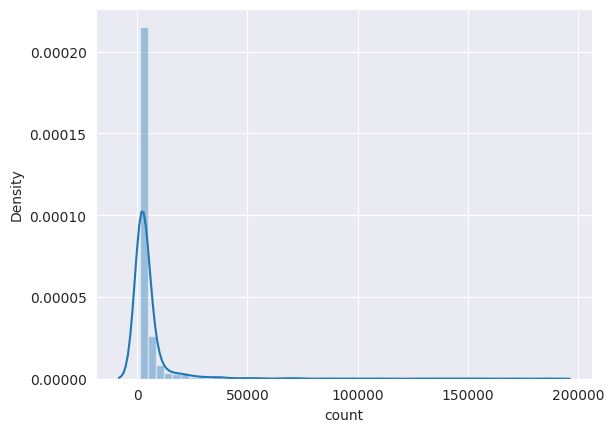

In [130]:
sns.distplot(high_accident_cities)

<ipython-input-131-a69b07a78e7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

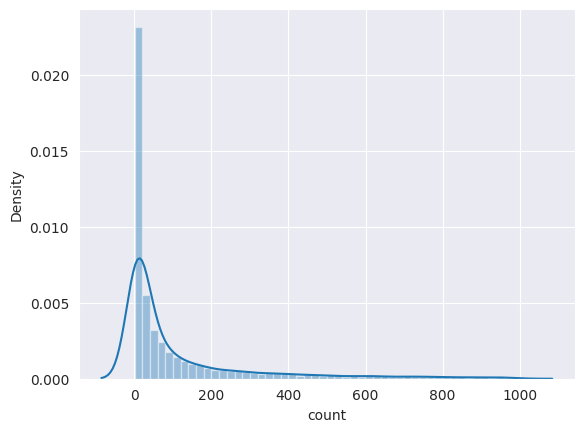

In [131]:
sns.distplot(low_accident_cities)

In [132]:
# Getting no of cities less than 10 accidents
cities_by_accident[cities_by_accident < 10]

City
Yermo                           9
Washington Crossing             9
Falfurrias                      9
Lookout Mountain                9
Clemons                         9
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 4238, dtype: int64

### Start Time

In [133]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [134]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [135]:
# Transforming it into pandas timestamp
df.Start_Time = pd.to_datetime(df["Start_Time"], format='ISO8601')

# df.Start_Time = pd.to_datetime(df["Start_Time"], format = "%Y-%m-%d %H:%M:%S.%f")  # If you want nanosecond level precision

# df.Start_Time = pd.to_datetime(df["Start_Time"], format = "%Y-%m-%d %H:%M:%S")    # If you don't want nanosecond level precision
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

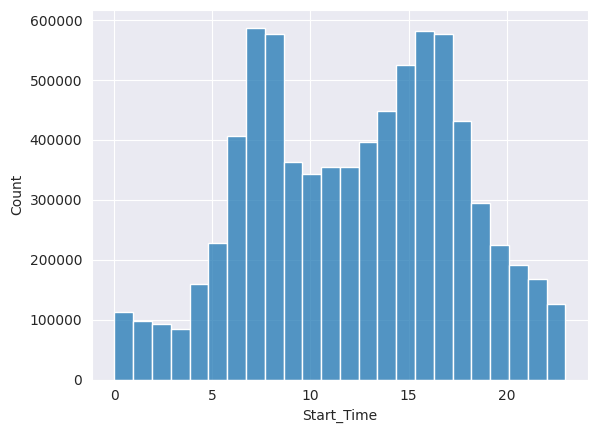

In [136]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

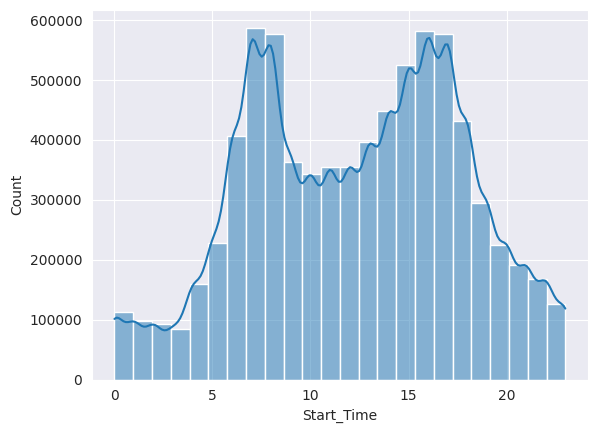

In [137]:
# Creating distribution plot using histplot
sns.histplot(df.Start_Time.dt.hour, bins=24, kde=True, kde_kws={"bw_adjust": 2})

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

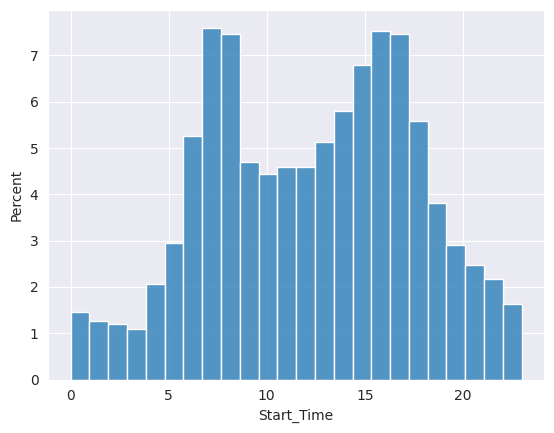

In [138]:
# Getting histogram in percentage form
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

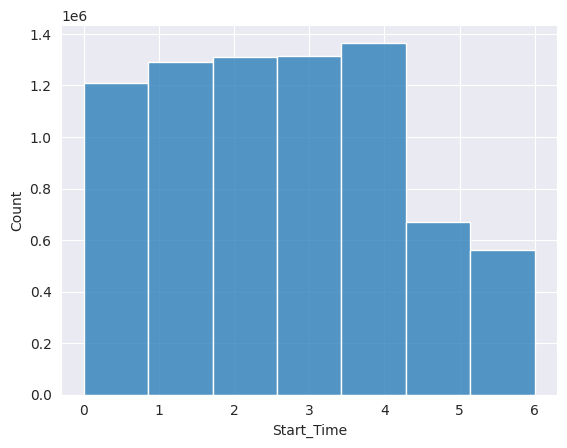

In [139]:
# Getting histplot of which day of week has more accidents
sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

#### Is distribution of accidents by hours the same on weekends as on weekdays?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

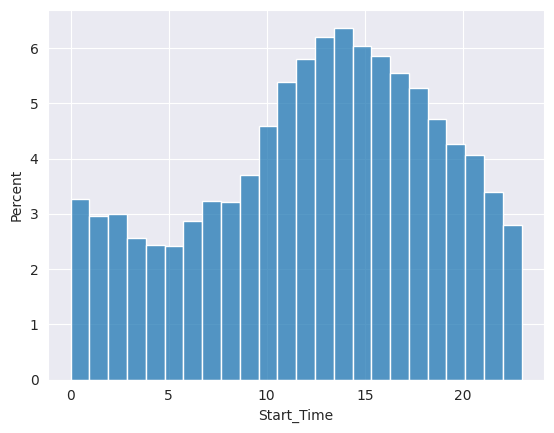

In [140]:
# Lets check the accidents by hours on Sunday
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

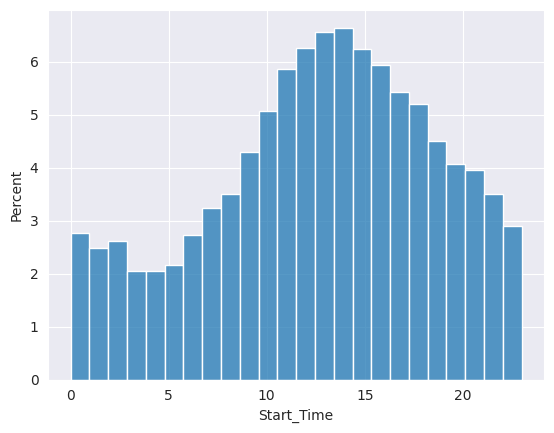

In [141]:
# Lets check the accidents by hours on Saturday
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins=24, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

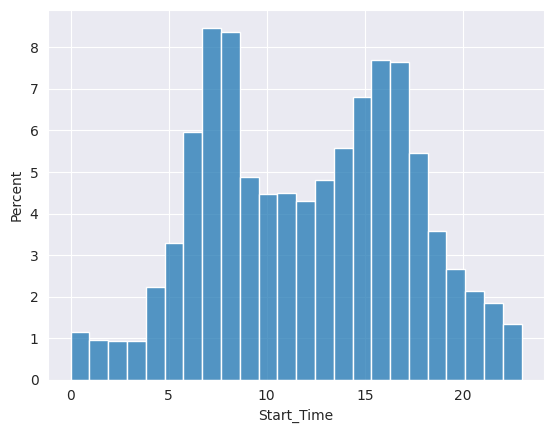

In [142]:
# Lets check the accidents by hours on Monday
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Percent'>

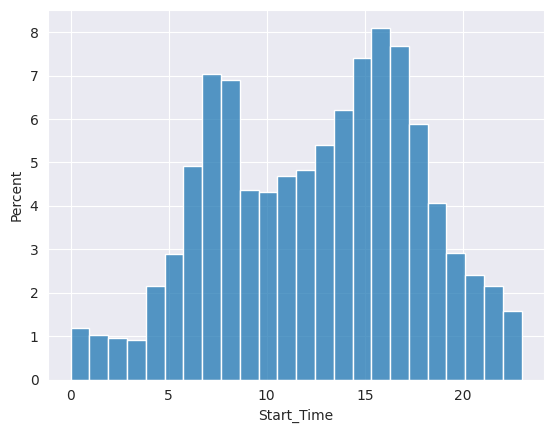

In [143]:
# Lets check the accidents by hours on Friday
firdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.histplot(firdays_start_time.dt.hour, bins=24, stat='percent')

### Check which months have more accidents?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

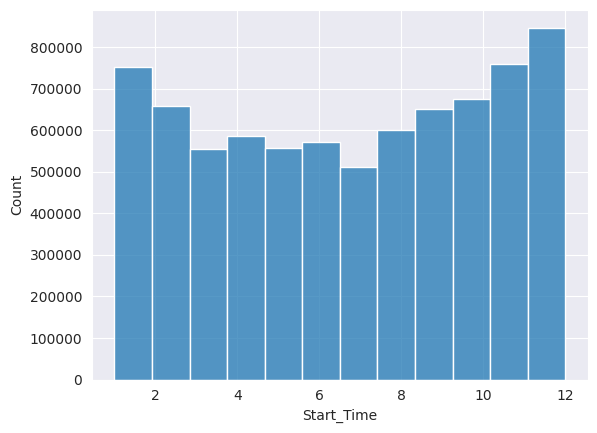

In [144]:
# Not used cleaned data
sns.histplot(df.Start_Time.dt.month, bins=12)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

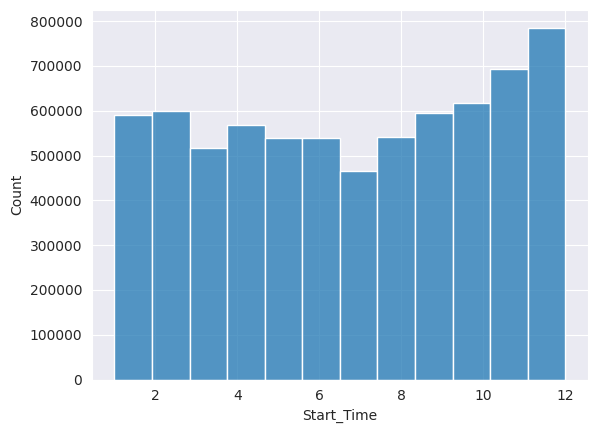

In [83]:
# Cleaned data is used.
sns.histplot(cleaned_df.Start_Time.dt.month, bins=12)

Actually accidents are equally distributed all over the year. Here graph is little higher in NOV & DEC because of 2 different source of data.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

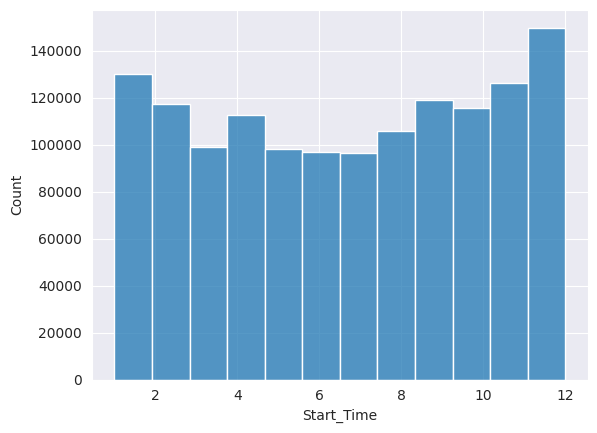

In [145]:
# Number of accidets happening on Fridays of each month
sns.histplot(firdays_start_time.dt.month, bins=12)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Time', ylabel='Count'>

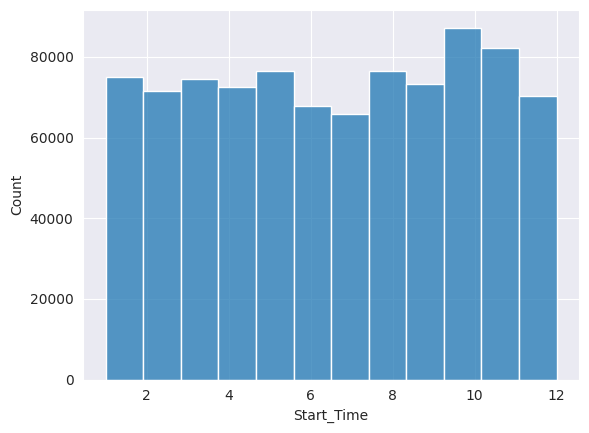

In [146]:
# Checking year by year accidents.
# We can check missing values of accidents in a particular month of the year.
accident_each_month_per_year = df[df.Start_Time.dt.year == 2018]
sns.histplot(accident_each_month_per_year.Start_Time.dt.month, bins=12)

## Checking States with highest number of accidents

In [84]:
cleaned_df.State

9206       CA
9207       CA
9208       CA
9209       CA
9210       CA
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7049400, dtype: object

In [85]:
cleaned_df['State'].value_counts()

State
CA    1525190
FL     816564
TX     518839
SC     370079
NC     321527
NY     316405
VA     284847
PA     263292
MN     180478
OR     172597
TN     162947
AZ     161198
GA     147403
IL     147144
LA     145467
MI     140429
MD     129433
NJ     126859
OH     101570
AL      99940
WA      96856
UT      93455
CO      85067
OK      82474
MO      68561
CT      64243
IN      63899
MA      56664
WI      30954
KY      30926
MT      25714
IA      23594
NE      22772
AR      20914
NV      19105
KS      19054
DC      17344
RI      15513
MS      14383
DE      13623
WV      11773
ID      10663
NM       9986
NH       9892
WY       3199
ND       2867
ME       2562
VT        905
SD        230
Name: count, dtype: int64

<Axes: ylabel='count'>

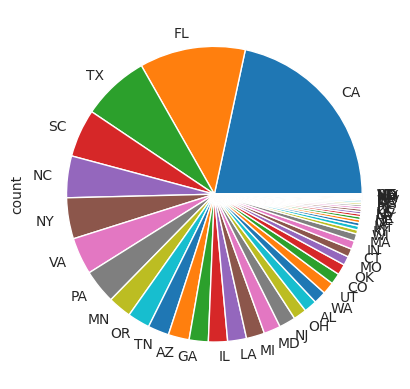

In [86]:
cleaned_df['State'].value_counts().plot(kind='pie')

<Axes: ylabel='State'>

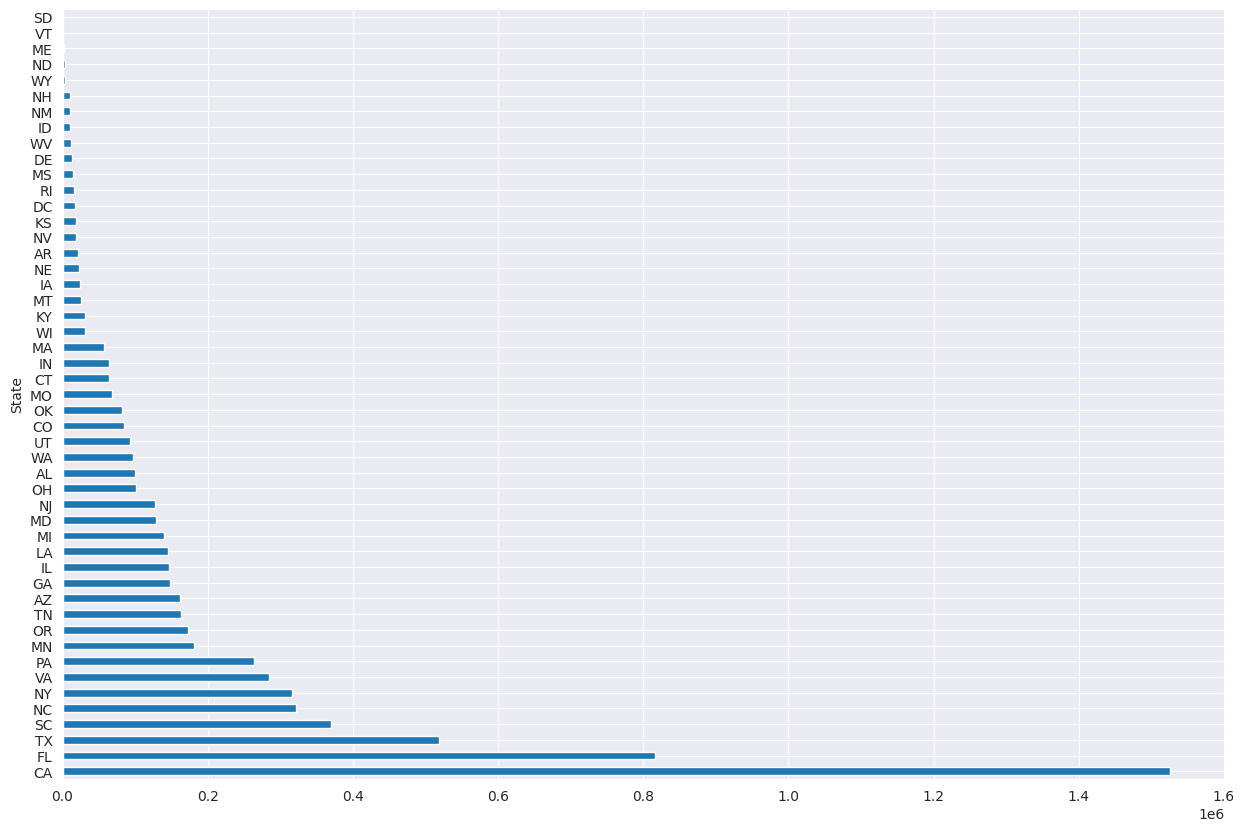

In [88]:
cleaned_df['State'].value_counts().plot(kind='barh', figsize=(15, 10))

### Start Lattitude & Start Longitude

In [8]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [9]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [ ]:
# reducing point size
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001)

In [5]:
# Taking longer time. So reduce the sample size.
# Using 10% of the total sample size
sample_df = df.sample(int(0.01 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

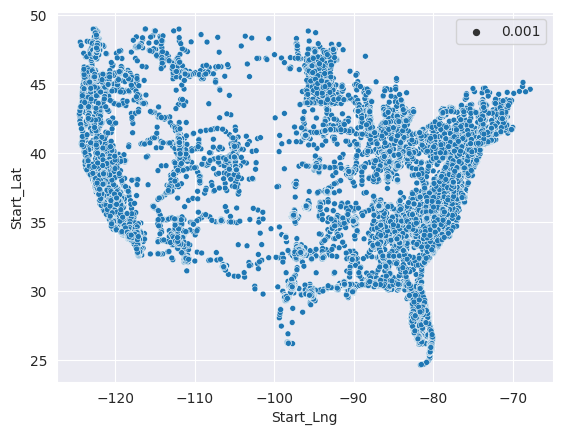

In [6]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

#### Creating a Map using folium

In [13]:
import folium

In [14]:
folium.Map()

In [16]:
folium.Map(location=[38.9, -77.5], start_zoom=12)

In [17]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [18]:
map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

#### Creating Heat Maps

In [19]:
from folium.plugins import HeatMap

In [20]:
# using sample points out of 7.7M+ dataset
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pair = zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pair).add_to(map)
map

## Questions & Answers
1. Are there more accidents in warmer or colder areas?
2. Top 5 states having highest no of accidents? Accidents per capita?
3. Does New York shows up in the list? If yes, then why its accident count lower than other being most populated city in USA? (Rank of accidents - 44th) why is it so?
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
5. What times of the day/night are accidents more frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trends of accidents year over year(decreasing/increasing or same)?
9. When is accidents per unit traffic highest?
10. There is no evidence of a particular month having higher number of accidents. So accidents can happens equally in any season.
11. 

# Summary & Conclusion
1. More than 91% of cities has accident lower than 1000
2. Almost 9% of cities has accident higher than 1000
3. Over 4238 cities has accident count less than 10 out of 13679 cities. That is almost 31% of total cities of USA.
4. New York City is most popular city in USA. But it stand at 45th in number of road accident per city.
5. Top 3 most road accident prone State are - California, Florida, Texas.
6. Weekdays (Monday to Friday) has significantly higher number of accidents than weekends (Saturday & Sunday)
7. No of accidents in all weekday are almost same. But among weekdays Monday has lowest and Friday has the highest number of accidents.
8. No of accidents in weekends are almost same. But Saturday has more accidents than Sunday.
4. Maximum no of accidents occurs during 6:00 - 9:00am  and   2:00 - 6:00pm in Weekdays.
8. Maximum no of accidents occurs during 11:00am - 6:00pm in Weekends.
9. There are 3 sources of data. Keep eyes on each of sources for each year.
10. Almost 2/3 of all the accidents occurs at Day and 1/3 of all the accidents occurs at Night.
11. There was no Amenity ....
12. In most of the cases there was no precipitation.
13. In most of the cases wind speed also normal. Most cases 0mph, for significant amount of cases wind speed was (7-13)mph.
14. Mean of the air pressure is 29.53inch which is very close to normal air pressure 29.92inch mercury.
15. Again mean of the temperature is 61F which is normal average temperature of USA.
16. Mean of the visibility is 9.1mile which is perfectly visible condition.
17. Most of the accidents are Short-medium level severe. So they have short-medium delays in traffic.
18. Accidents counts varies almost equally to various weather conditions. So weather condition not important.
19. 

# Make the Cleaned dataset For future use.

In [48]:
import os

# Specify the file path
file_path = '/kaggle/working/US-Road-Accident-Cleaned-Data.csv'

# Check if the file exists, then delete it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

/kaggle/working/US-Road-Accident-Cleaned-Data.csv has been deleted.


In [49]:
# Save DataFrame to CSV file
cleaned_df.to_csv('US-Road-Accident-Cleaned-Data.csv', index=False)

#### Code to Compress a CSV File into a ZIP File:

In [50]:
import zipfile

# File paths
# csv_file = 'output.csv'  # The CSV file to compress
# zip_file = 'output.zip'  # The name of the ZIP file

csv_file = '/kaggle/working/US-Road-Accident-Cleaned-Data.csv'
zip_file = '/kaggle/working/US-Road-Accident-Cleaned-Data.zip'

# Create a ZIP file and add the CSV file to it
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_file)
    print(f"{csv_file} has been compressed into {zip_file}.")

/kaggle/working/US-Road-Accident-Cleaned-Data.csv has been compressed into /kaggle/working/US-Road-Accident-Cleaned-Data.zip.
